## **CSMODEL S11 Group 17 - Project 2**
<br>

#### **Members:**
- Jadie, Joshue Salvador A.
- Lopez, Angel L.
- Ponce, Andre Dominic H. 

<br>

#### **Last Modified: September 11, 2021**

For this project, as `15 datasets` were given to choose and work from, the group has decided to work with `dataset 1`. With the dataset already provided, it is loaded and pre-processed below.

In [135]:
# import required packages for dataset analysis and data mining
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# for matploblib graphs to be stored and displayed in the notebook's frontend
%matplotlib inline

# to auto-reload imported python modules when they are updated externally.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Dataset Representation**

The provided dataset file, `dataset1.csv`, is loaded into a DataFrame and pre-processed below.

In [136]:
# load 'dataset1.csv' to a dataframe
df = pd.read_csv('Dataset1.csv', header=None, sep='\n')

In [137]:
# display current dataframe and its values
df

,0
0,"5,14"
1,"0,2,10,12"
2,"3,5,13,14,16,17,19"
3,"1,3,4,7,9,10,14,17"
4,"15,16,17"
...,...
295,"8,13,14"
296,"4,6,9,11"
297,"2,4,8,11,12"
298,"5,6,7,9,13,14,16"


As of now, the values from the dataset are not properly separated in the current dataframe. Proper processing and separation of the values into columns in the dataframe are done below.

In [138]:
# separate each row's values into columns in the dataframe with comma (',')
df = df[0].str.split(',', expand=True)

In [139]:
# display current dataframe and its values
df

,0,1,2,3,4,5,6,7
0,5,14,None,None,None,None,None,None
1,0,2,10,12,None,None,None,None
2,3,5,13,14,16,17,19,None
3,1,3,4,7,9,10,14,17
4,15,16,17,None,None,None,None,None
...,...,...,...,...,...,...,...,...
295,8,13,14,None,None,None,None,None
296,4,6,9,11,None,None,None,None
297,2,4,8,11,12,None,None,None
298,5,6,7,9,13,14,16,None


In [140]:
# display general information about the current dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       267 non-null    object
 2   2       222 non-null    object
 3   3       189 non-null    object
 4   4       151 non-null    object
 5   5       109 non-null    object
 6   6       80 non-null     object
 7   7       40 non-null     object
dtypes: object(8)
memory usage: 18.9+ KB


In [141]:
# display the dimensions of the current dataframe (rows, columns)
df.shape

(300, 8)

Currently, there are `300` rows and `8` columns in the dataframe.

Analyzing thoroughly the dataset both in its respective file and in the dataframe as loaded, the group observed that each row in the dataset have **different numbers of values**. For instance, the first row contains only `2` values, while the third row contains `8` values. With the dataset having no header (column names) as well, the most accurate explanation to its structure is that it refers to a **list of item sets**. 

With that said, each row in the dataset can be represented as an **item set**- the first row is an item set containing items `5` and `14` while the second row is an item set containing items `0, 2, 10` and `12`. As each item in the dataset are represented as **unique numbers**, multiple representations can be made to these items such as items in a local market, words in a document, and many more. For this project, the group will assume that each row in the dataset represents the **set of food bought by a customer in a restaurant**.

With the acquired observations and assumptions stated above, the group continues the pre-processing of the dataframe which is shown below.

First, the values of each row in the dataframe are organized in an **array**. This array will respresent the **list of food sets**.

In [142]:
# list containing the food sets of each customer from the restaurant
food_sets = []

# properly organize the 300 food sets from the dataset to the list
for i in range(df.shape[0]):
    # sort the values accordingly, in ascending order
    food_set = np.sort([int(x) for x in df.iloc[i].values.tolist() if str(x) != 'None'])
    # add the newly organized food set to the list of food sets
    food_sets.append(food_set)

In [143]:
# display the contents of the list
for i, food_set in enumerate(food_sets):
    print('Food Set', i, food_set)

Food Set 0 [ 5 14]
Food Set 1 [ 0  2 10 12]
Food Set 2 [ 3  5 13 14 16 17 19]
Food Set 3 [ 1  3  4  7  9 10 14 17]
Food Set 4 [15 16 17]
Food Set 5 [ 3  4  5  6  7  8 12 15]
Food Set 6 [ 1  4 10 12 13 19]
Food Set 7 [ 2  6 15 19]
Food Set 8 [ 2 16]
Food Set 9 [ 0  7 11 12 13 15 16]
Food Set 10 [9]
Food Set 11 [2 3 5 7 8]
Food Set 12 [ 2  4  6  9 12 13 18 19]
Food Set 13 [ 0  1  2  7 13 15 17 19]
Food Set 14 [ 2  7 14 19]
Food Set 15 [ 4  5  9 13]
Food Set 16 [4]
Food Set 17 [ 5 19]
Food Set 18 [ 0  6 16 18 19]
Food Set 19 [ 3  4 11 13 14 15]
Food Set 20 [ 2 11]
Food Set 21 [ 0  1  7  9 10 11 13]
Food Set 22 [ 0  5  8  9 12 13 16 18]
Food Set 23 [ 4  8 10 12 14 15 17]
Food Set 24 [ 5  7 14]
Food Set 25 [ 0  1  3  4  8 10 12 14]
Food Set 26 [3]
Food Set 27 [10 14]
Food Set 28 [ 2  5 13 15]
Food Set 29 [ 4  6  9 10 11 13 17]
Food Set 30 [ 0  2 11 12 13 14 15 19]
Food Set 31 [10 17]
Food Set 32 [19]
Food Set 33 [ 2  8 11 12 14 15 18]
Food Set 34 [11]
Food Set 35 [ 6  7  8 12 13 15 17 18]
F

Let's see **how many unique food items** are there in the list of food sets.

In [144]:
# get the unique food items in the list
items = set()
items.update(*food_sets)

In [145]:
# display the unique food items 
items

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [146]:
# display the number of unique food items
len(items)

20

As observed, there are `20` unique food items in the whole list of food sets, from food item `0` to food item `19`.

With the organized list of food sets, the final dataframe to be used for data mining later on is created and pre-processed below.

In [147]:
# create the dataframe for the list of food sets with 300 rows and 20 columns
food_set_df = pd.DataFrame([[0 for _ in range(20)] for _ in range(300)], columns=list(items))

# assign value '1' for existing food item in each row
for i, food_set in enumerate(food_sets):
    food_set_df.iloc[i, food_set] = 1

In [148]:
# display the final dataframe for the list of food sets
food_set_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1
3,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
296,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
297,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
298,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0


In [149]:
# display the dimensions of the final dataframe (rows, columns)
food_set_df.shape

(300, 20)

With the pre-processed and finalized dataframe, exploratory data analysis and data mining are done below.

### **Exploratory Data Analysis**

##### ***What are the top 3 most bought food items from the list of food sets?***

For this question, the group wants to determine which among the `20` food items in the list of food sets are the **top 3 most bought food items**. To do this, the `frequency` of each food item is acquired by counting the number of `1s` of each variable (food item) in the dataframe.

In [150]:
# get the frequency of each food item from the dataset again and sort the values in ascending order.
freqs = food_set_df.sum().sort_values()

In [151]:
# display the acquired frequencies
freqs

9     54
10    58
19    60
16    61
18    61
2     62
3     63
1     63
11    65
7     66
17    66
6     68
0     68
8     69
14    73
12    74
4     77
15    79
13    84
5     87
dtype: int64

It can be observed that food item `9` is the **least occurring and bought food** while food item `5` is the **most occurring and bought food** from the restaurant.

The acquired frequencies of each food item shall be visualized using a **bar plot** since the food items are **categorical variables**.

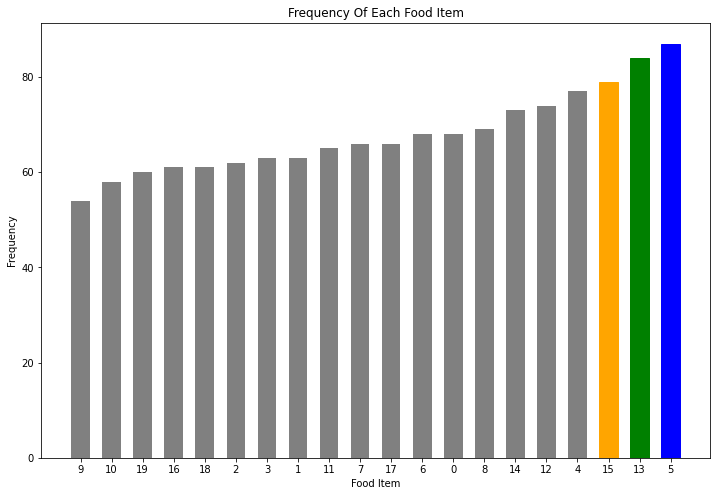

In [152]:
# get the x and y values of the acquired frequencies
x = [str(item) for item in freqs.index.tolist()]
y = freqs.values.tolist()

# setup figure size and facecolor of bar plot
plt.figure(figsize=(12, 8), facecolor='white')

# setup bar plot with matplotlib
bar_plot = plt.bar(x, y, color='gray', width=0.6)
plt.title('Frequency Of Each Food Item')
plt.xlabel('Food Item')
plt.ylabel('Frequency')

# set bar color of top 3 most bought food items
bar_plot[19].set_color('blue')
bar_plot[18].set_color('green')
bar_plot[17].set_color('orange')

# display bar plot
plt.show()

As observed both from the Series object that contains the frequencies per food item and the created bar plot, the top 3 most bought food items from the list of food sets are **food items `5`, `13`, and `15`**. Food item `5` as 1st, being bought `87` times. Food item `13` being 2nd as being bought `84` times. Food item `15` being 3rd as bought `79` times from the acquired list of food sets. 

##### ***What is the most frequent number of food items bought in the list of food sets?***

For this question, the group wants to find out the most frequent number of food items bought by the customers with the given list of food sets as this can possibly affect the results to be given by the data mining process which is done later on in this project. To further explain, the group wants to know if the customers usually buy `N` food items from the restaurant, `N` being the number of food items bought. The process towards determining the most frequent number of food items bought is done below.

In [160]:
# create a copy of the food set dataframe
temp_df = food_set_df.copy()

# get the number of food items per row (food set) and create a new column to store these values
temp_df['num_food_items'] = temp_df.sum(axis=1)

# display the created column containing the number of food items per row
temp_df['num_food_items']

0      2
1      4
2      7
3      8
4      3
      ..
295    3
296    4
297    5
298    7
299    2
Name: num_food_items, Length: 300, dtype: int64

With the number of food items per row acquired, the group now wants to determine the **most frequent number of food items bought**.

In [162]:
# get the frequencies of each food set's number of food items bought
set_item_freqs = temp_df['num_food_items'].value_counts()

# display the frequencies
set_item_freqs

2    45
5    42
7    40
8    40
4    38
3    33
1    33
6    29
Name: num_food_items, dtype: int64

As observed in the results, there are `8` different numbers of food items bought from all food sets.

The **most frequent number of food items bought** by customers in the list of food sets is `2` food items with a frequency of `45` customers. The **least frequent number of food items bought** is `6` food items, having a frequency of `29` customers. It is notable as well for the group that there were `40` customers who bought `8` food items from the restaurant.

For the **visualization** of the acquired frequencies per number of food items bought from each food set, **bar plot** is used.

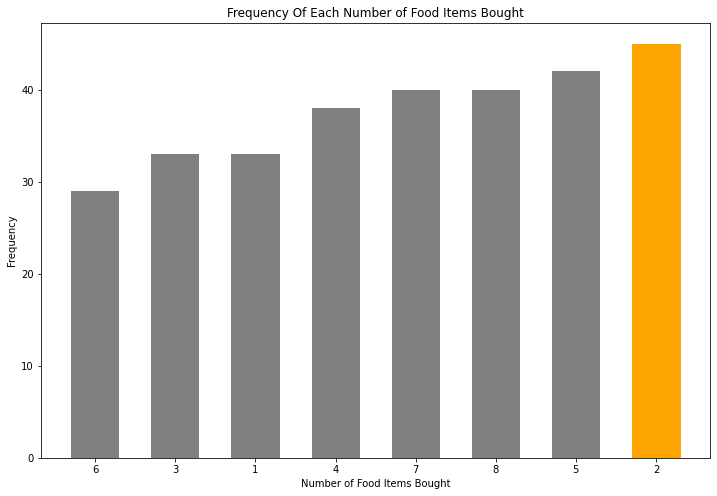

In [173]:
# sort the Series object in ascending order
sorted_freqs = set_item_freqs.sort_values()

# get the x and y values of the acquired frequencies
x = [str(item) for item in sorted_freqs.index.tolist()]
y = sorted_freqs.values.tolist()

# setup figure size and facecolor of bar plot
plt.figure(figsize=(12, 8), facecolor='white')

# setup bar plot with matplotlib
bar_plot = plt.bar(x, y, color='gray', width=0.6)
plt.title('Frequency Of Each Number of Food Items Bought')
plt.xlabel('Number of Food Items Bought')
plt.ylabel('Frequency')

# set bar color of the most frequent number of food items bought
bar_plot[7].set_color('orange')

# display bar plot
plt.show()

### **Data Mining**

As the group observed that the dataset represents the **list of item sets**, and for this project, the group assumed that each item set represents the **set of food bought by a customer from the restaurant**, the data mining technique to be used and applied the dataset, as already processed, is `Association Rule Mining`.

To apply `Association Rule Mining`, the `rule_miner.py` file will be used which contains the `RuleMiner` class and its defined functions that are needed for **rule mining**. Importing of the `RuleMiner` class is done below.

In [174]:
# import the rule miner python module
from rule_miner import RuleMiner

As stated by the specifications, a `RuleMiner` object shall be instantiated with support threshold `support_t` equal to `10` and confidence threshold `confidence_t` equal to `0.6`.

In [175]:
# instantiate RuleMiner object with support_t set to 10 and confidence_t set to 0.6
rule_miner = RuleMiner(10, 0.6)

With the `RuleMiner` object instantiated and ready for the rule mining process, the group wants to determine the `support` of some food sets in the dataset first. The group's chosen food sets which are `{5}`, `{1, 5}`, `{0, 1, 2, 3}`, and `{5, 10, 15}` shall have their `support` values acquired below.

In [177]:
# get and print the support of each chosen food set
print(rule_miner.get_support(food_set_df, [5]))
print(rule_miner.get_support(food_set_df, [1, 5]))
print(rule_miner.get_support(food_set_df, [0, 1, 2, 3]))
print(rule_miner.get_support(food_set_df, [5, 10, 15]))

87
15
1
2


From the acquired results, food set `{5}` is present in `87` out of `300` food sets, food set `{1, 5}` is present in `15` food sets, food set `{0, 1, 2, 3}` is present in `1` food set only, and lastly, food set `{5, 10, 15}` is present in `2` food sets.

With the `get_support()` function tested, the group now proceeds to getting the frequent food sets using the `get_frequent_itemsets()` function together with the defined support threshold `10`. The frequent food sets are acquired below.

In [180]:
# get the frequent food sets with defined support threshold 10
frequent_food_sets = rule_miner.get_frequent_itemsets(food_set_df)
frequent_food_sets

[[3, 4, 5],
 [3, 5, 7],
 [3, 5, 13],
 [3, 5, 14],
 [4, 14, 15],
 [5, 7, 8],
 [5, 7, 14],
 [5, 8, 18],
 [5, 9, 13],
 [5, 13, 16],
 [5, 14, 16],
 [8, 11, 15],
 [11, 13, 15],
 [13, 14, 15],
 [13, 15, 18]]

With defined support threshold `10`, the frequent food sets from the list of food sets are as follows:
- `{3, 4, 5}`
- `{3, 5, 7}`
- `{3, 5, 13}`
- `{3, 5, 14}`
- `{4, 14, 15}`
- `{5, 7, 8}`
- `{5, 7, 14}`
- `{5, 8, 18}`
- `{5, 9, 13}`
- `{5, 13, 16}`
- `{5, 14, 16}`
- `{8, 11, 15}`
- `{11, 13, 15}`
- `{13, 14, 15}`
- `{13, 15, 18}`

With the frequent food sets acquired, the group wants to get of all the possible rules for these frequent food sets in the dataset. The `get_rules()` function of the `RuleMiner` object shall be used to acquire the list of rules from the frequent food sets.

In [181]:
# get and print all possible rules from each frequent food set
for food_set in frequent_food_sets:
    print(rule_miner.get_rules(food_set))

[[[3, 4], [5]], [[5], [3, 4]], [[3, 5], [4]], [[4], [3, 5]], [[4, 5], [3]], [[3], [4, 5]]]
[[[3, 5], [7]], [[7], [3, 5]], [[3, 7], [5]], [[5], [3, 7]], [[5, 7], [3]], [[3], [5, 7]]]
[[[3, 5], [13]], [[13], [3, 5]], [[3, 13], [5]], [[5], [3, 13]], [[5, 13], [3]], [[3], [5, 13]]]
[[[3, 5], [14]], [[14], [3, 5]], [[3, 14], [5]], [[5], [3, 14]], [[5, 14], [3]], [[3], [5, 14]]]
[[[4, 14], [15]], [[15], [4, 14]], [[4, 15], [14]], [[14], [4, 15]], [[14, 15], [4]], [[4], [14, 15]]]
[[[5, 7], [8]], [[8], [5, 7]], [[5, 8], [7]], [[7], [5, 8]], [[7, 8], [5]], [[5], [7, 8]]]
[[[5, 7], [14]], [[14], [5, 7]], [[5, 14], [7]], [[7], [5, 14]], [[7, 14], [5]], [[5], [7, 14]]]
[[[5, 8], [18]], [[18], [5, 8]], [[5, 18], [8]], [[8], [5, 18]], [[8, 18], [5]], [[5], [8, 18]]]
[[[5, 9], [13]], [[13], [5, 9]], [[5, 13], [9]], [[9], [5, 13]], [[9, 13], [5]], [[5], [9, 13]]]
[[[5, 13], [16]], [[16], [5, 13]], [[5, 16], [13]], [[13], [5, 16]], [[13, 16], [5]], [[5], [13, 16]]]
[[[5, 14], [16]], [[16], [5, 14]], [

With the rules now acquired from each frequent food set, the group wants to determine first the `confidence` of some of these rules. Using the `get_confidence()` function of the `RuleMiner` object, the group wants to get the `confidence` of the rules `{3, 4} -> {5}`, `{13} -> {3, 5}`, `{13, 15} -> {14}`, and `{15, 18} -> {13}` which is done below.

In [182]:
# get and print the confidence of each chosen rule
print('{:.2f}'.format(rule_miner.get_confidence(food_set_df, [[3, 4], [5]])))
print('{:.2f}'.format(rule_miner.get_confidence(food_set_df, [[13], [3, 5]])))
print('{:.2f}'.format(rule_miner.get_confidence(food_set_df, [[13, 15], [14]])))
print('{:.2f}'.format(rule_miner.get_confidence(food_set_df, [[15, 18], [13]])))

0.48
0.12
0.39
0.55


The confidence of `{3, 4} -> {5}` is `0.48`, `0.12` for `{13} -> {3, 5}`, `0.39` for `{13, 15} -> {14}`, and `0.55` for `{15, 18} -> {13}`.

With the `get_confidence()` function tested, the group now wants to move on to the final part of the association rule mining process, to acquire all of the association rules given the defined support and confidence thresholds. Using the `get_association_rules()` function of the `RuleMiner` object, the **association rules** are acquired below.

In [183]:
# get all association rules wherein both support and confidence are greater than the
# support threshold '10' and confidence threshold '0.6'
association_rules = rule_miner.get_association_rules(food_set_df)

# display all association rules that satisfied the defined thresholds
association_rules

[[[3, 7], [5]], [[5, 9], [13]], [[9, 13], [5]], [[8, 11], [15]]]

### **Insights and Conclusions**

With a defined support threshold of `10` and confidence threshold of `0.6`, the following association rules derived from the list of food sets bought by customers from the restaurant are:
- `{3, 7} -> {5}`
    - It is more likely that if a customer buys food items `3` and `7` then he/she will buy food item `5` as well.
- `{5, 9} -> {13}`
    - It is more likely that if a customer buys food items `5` and `9` then he/she will buy food item `13` as well.
- `{9, 13} -> {5}`
    - It is more likely that if a customer buys food items `9` and `13` then he/she will buy food item `5` as well.
- `{8, 11} -> {15}`
    - It is more likely that if a customer buys food items `8` and `11` then he/she will buy food item `15` as well.